# USA Data Processing
This notebook processes historical balancing authority data to estimate transmission line capacity between regions

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
from itertools import permutations, combinations
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import os

## Helper Functions

In [2]:
def download_file(url: str, destination: str):
    response = requests.get(url)
    
    if response.status_code == 200:
        with open(destination, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded successfully to {destination}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

In [3]:
def file_exists(file_path: str):
    path = Path(file_path)
    return path.is_file()

## Get Balancing Authority Shapes 
Shapes are taken from [Electricity Maps](https://github.com/electricitymaps/electricitymaps-contrib/blob/master/web/geo/world.geojson), as they have a spatially resolved file (ie. no overlaps between balancing authorities)

In [13]:
geojson = "world.geojson"

if not file_exists(geojson):
    url = "https://raw.githubusercontent.com/electricitymaps/electricitymaps-contrib/master/web/geo/world.geojson"
    download_file(url, geojson)

gdf = gpd.read_file(geojson)
gdf = gdf[gdf["countryKey"] == "US"]
gdf.head(5)

File downloaded successfully to world.geojson


,zoneName,countryKey,countryName,geometry
287,US-AK,US,United States,"MULTIPOLYGON (((-139.06039 59.99977, -139.1827..."
288,US-CAL-BANC,US,United States,"MULTIPOLYGON (((-123.03663 40.36388, -122.6946..."
289,US-CAL-CISO,US,United States,"MULTIPOLYGON (((-123.39303 41.16099, -123.4794..."
290,US-CAL-IID,US,United States,"MULTIPOLYGON (((-114.75544 32.64156, -114.5261..."
291,US-CAL-LDWP,US,United States,"MULTIPOLYGON (((-118.65899 34.16872, -118.3961..."


<Axes: >

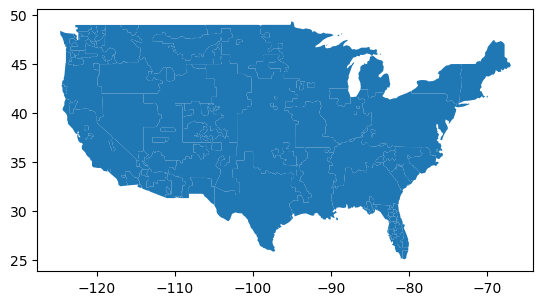

In [14]:
bas = gdf.copy()
bas["region"] = bas["zoneName"].map(lambda x: x.split("-")[1])
bas = bas[~bas["region"].isin(["AK", "HI"])].drop(columns=["region"]) # drop alaska and hawaii
bas.plot()